In [1]:
#imports
import pandas as pd
import pyodbc
import ast
import matplotlib.pyplot as plt

In [2]:
#create data frame from xlsx / set options
df = pd.read_excel('games_detailed_info_6920.xlsx')
data_types = df.dtypes
pd.set_option("display.max_rows", 100)
pd.set_option('display.max_columns', 20)

In [3]:
#only inlclud needed fields
df=df[['id','bayesaverage','boardgamedesigner','averageweight']]

In [4]:
#some games are designed by more than one person
df

,id,bayesaverage,boardgamedesigner,averageweight
0,13,7.03556,['Klaus Teuber'],2.3399
1,822,7.32084,['Klaus-JÃ¼rgen Wrede'],1.9247
2,30549,7.54432,['Matt Leacock'],2.4220
3,68448,7.68858,['Antoine Bauza'],2.3397
4,36218,7.54296,['Donald X. Vaccarino'],2.3623
...,...,...,...,...
17058,10809,5.51052,"['Alan R. Moon', 'Aaron Weissblum']",1.0000
17059,23257,5.47984,"['Frank Zuuring', 'Peter Zuuring']",2.3750
17060,9272,5.49719,['Thomas Kotulla'],2.5000
17061,13392,5.49718,['Roger Sandell'],2.7500


In [5]:
#we want to be able to isolate designers
#change designer feild into list
df['boardgamedesigner'] = df['boardgamedesigner'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [6]:
# Create a new DataFrame with one designer per row
df = df.explode('boardgamedesigner', ignore_index=True)
df['designer_id'] = pd.factorize(df['boardgamedesigner'])[0]

In [7]:
#remove unwated rows
df = df[(df['averageweight'] != 0) & (df['bayesaverage'] != 0) & (df['boardgamedesigner'] != '(Uncredited)')]

In [8]:
df

,id,bayesaverage,boardgamedesigner,averageweight,designer_id
0,13,7.03556,Klaus Teuber,2.3399,0
1,822,7.32084,Klaus-JÃ¼rgen Wrede,1.9247,1
2,30549,7.54432,Matt Leacock,2.4220,2
3,68448,7.68858,Antoine Bauza,2.3397,3
4,36218,7.54296,Donald X. Vaccarino,2.3623,4
...,...,...,...,...,...
23305,23257,5.47984,Frank Zuuring,2.3750,7938
23306,23257,5.47984,Peter Zuuring,2.3750,7939
23307,9272,5.49719,Thomas Kotulla,2.5000,7940
23308,13392,5.49718,Roger Sandell,2.7500,7196


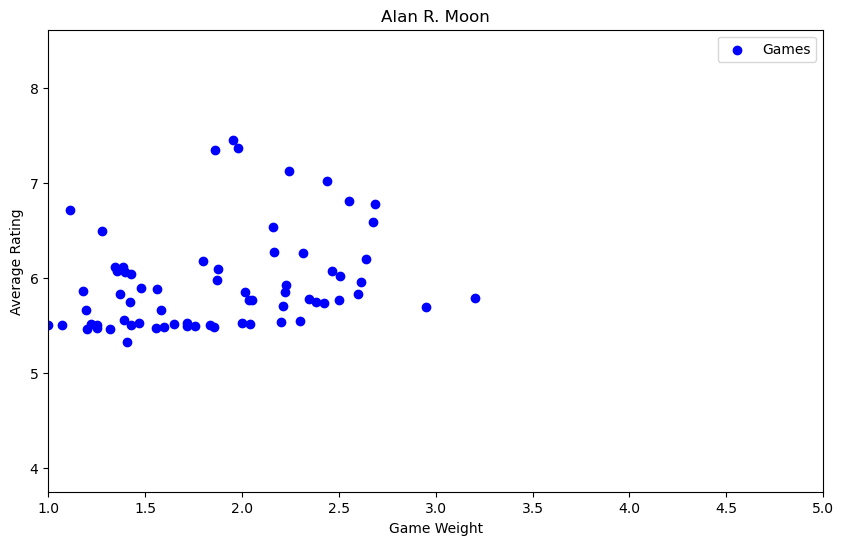

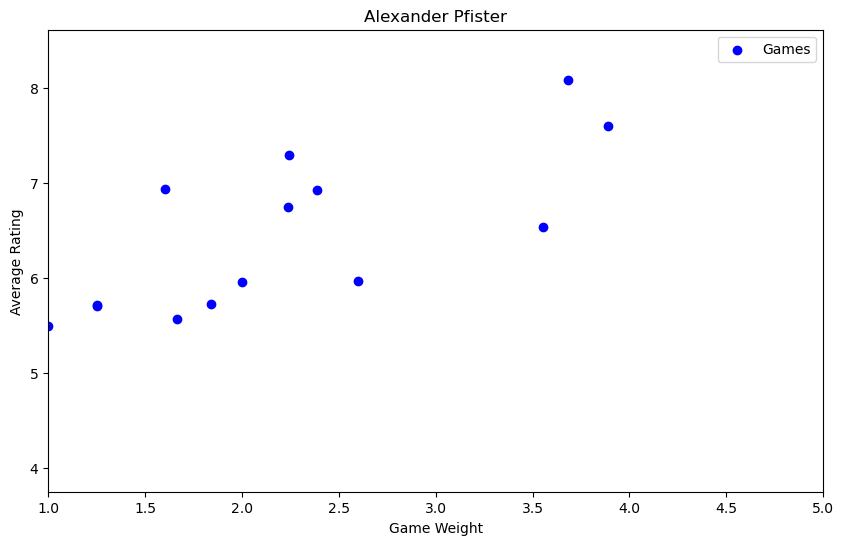

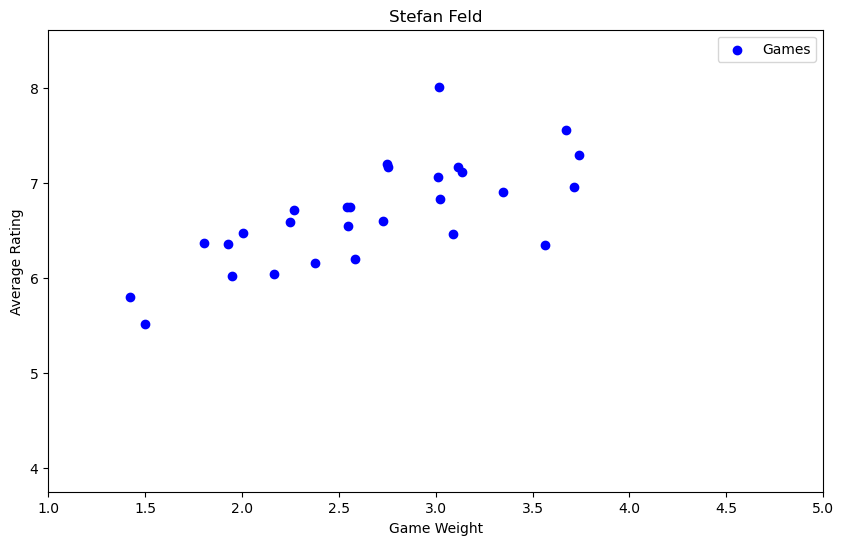

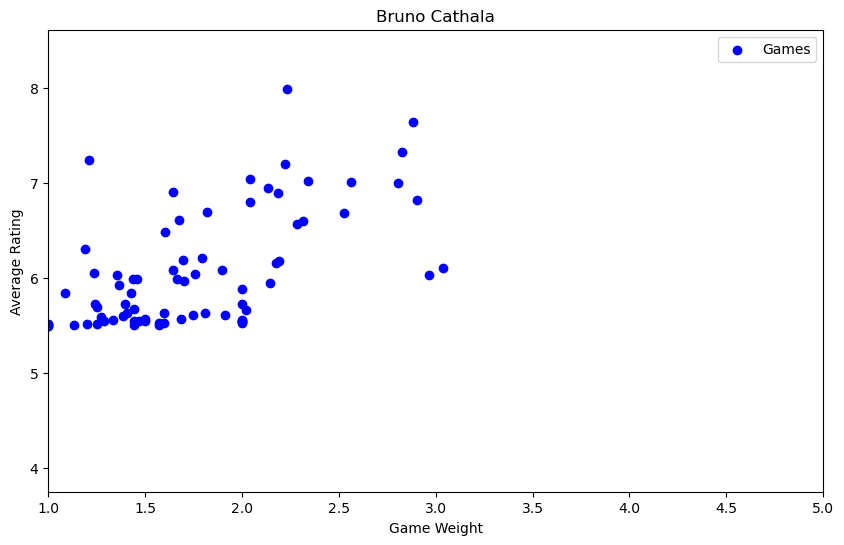

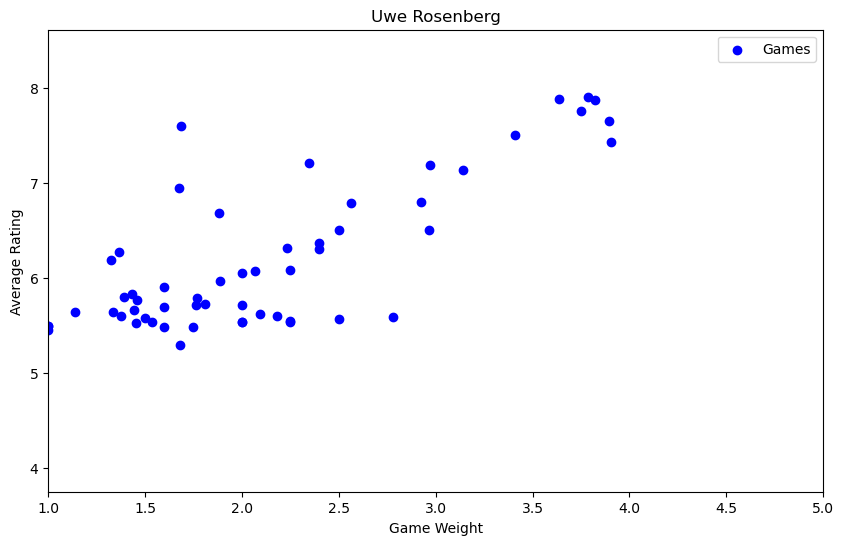

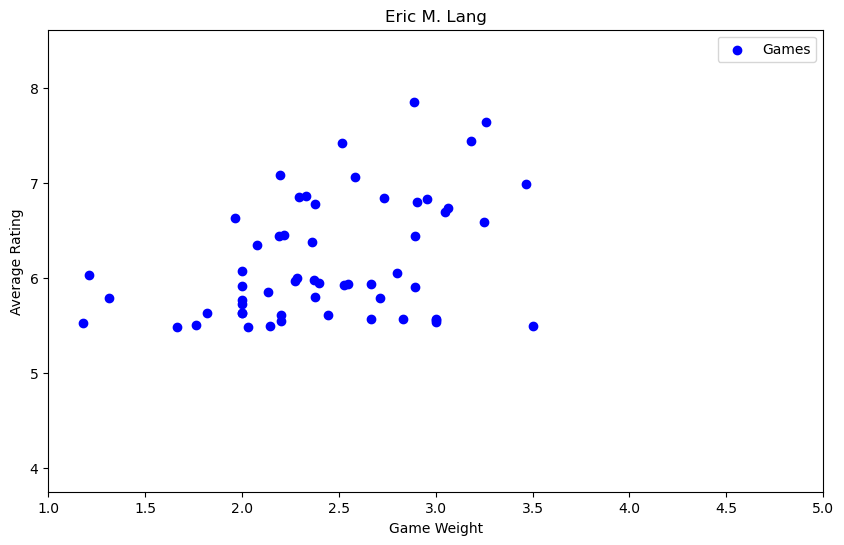

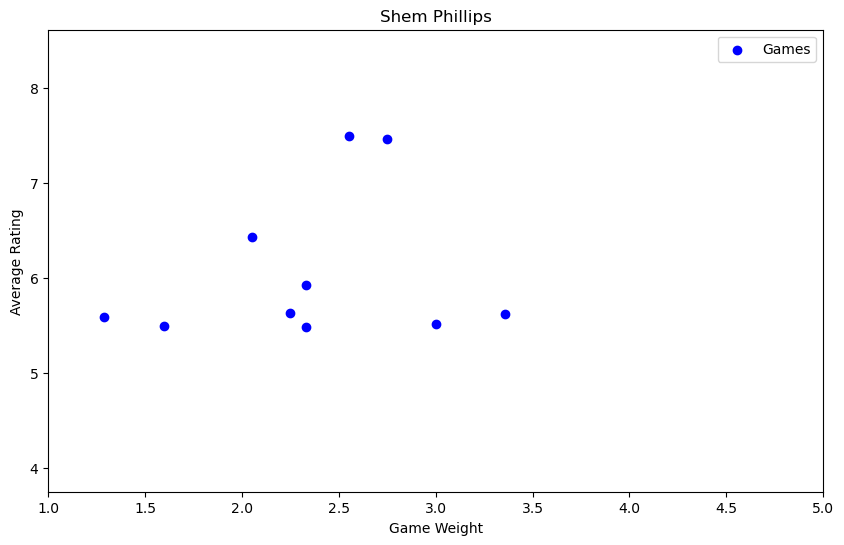

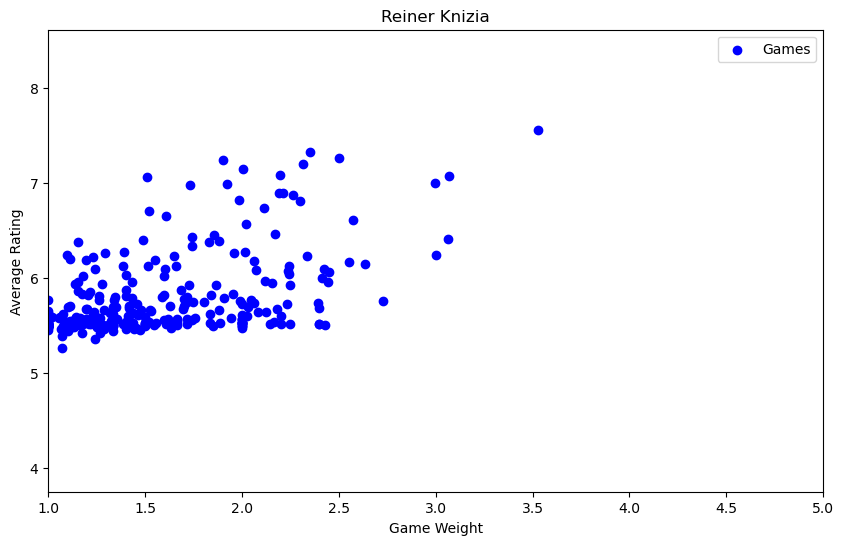

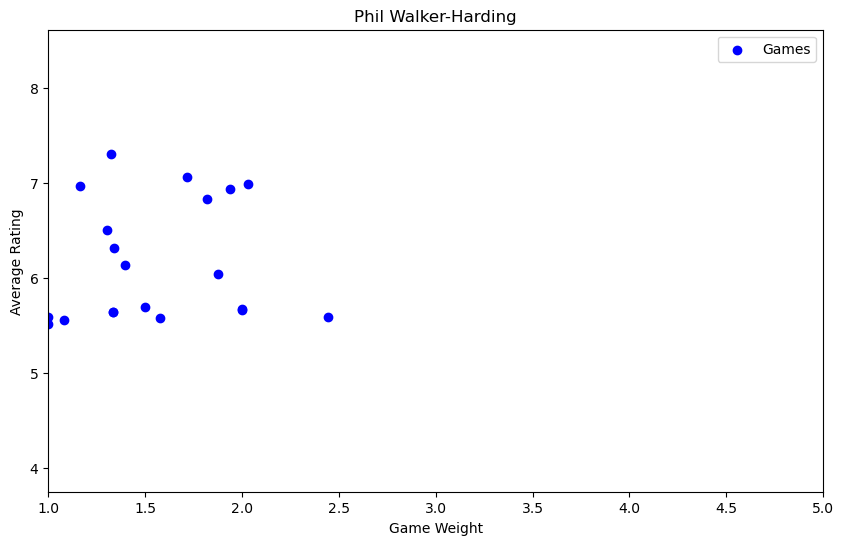

In [9]:
# List of manually selected designer_ids
designer_ids = [5,98,23,17,6,50,295,33,47]

# Create scatter plots for each designer
for designer_id in designer_ids:
    # Filter the DataFrame for the current designer
    designer_df = df.loc[df['designer_id'] == designer_id]
    plt.figure(figsize=(10, 6))
    plt.scatter(designer_df["averageweight"], designer_df["bayesaverage"], c='blue', marker='o', label="Games")

    # Customize the chart
    plt.xlabel("Game Weight")
    plt.ylabel("Average Rating")
    plt.title(designer_df.iloc[0]['boardgamedesigner'])
    plt.legend()

    plt.ylim(df['bayesaverage'].min(), df['bayesaverage'].max())
    plt.xlim(df['averageweight'].min(), df['averageweight'].max())
    plt.show()
